In [1]:
import sys

sys.path.append("../")

In [11]:
from data.utils import load_mean_parameters,rot6d_to_rotmat
from data.render_utils import Renderer
import constants
import config
from models.smpl import get_smpl_model

import torch
import numpy as np
import matplotlib.pyplot as plt

In [3]:
theta_mean = load_mean_parameters(config.SMPL_MEAN_PARAMS,rot6d=True)#load the real theta_mean
smpl = get_smpl_model()

pose = theta_mean[:,:144]
shape = theta_mean[:,144:154]

pose_mat = rot6d_to_rotmat(pose.reshape(-1,6)).reshape(-1,24,3,3)

output = smpl(global_orient=pose_mat[:,:1,:],body_pose=pose_mat[:,1:,:],betas=shape,pose2rot=False)


In [4]:
renderer = Renderer(smpl.faces)

In [7]:
renderer.faces.shape

(13776, 3)

In [51]:
pred_t = [0,0,2*5000/224+50]
img = torch.zeros(3,224,224)

In [24]:
pred_t

[0, 0, 45.642857142857146]

In [52]:
img = renderer(output.vertices.detach().numpy()[0],pred_t,img)

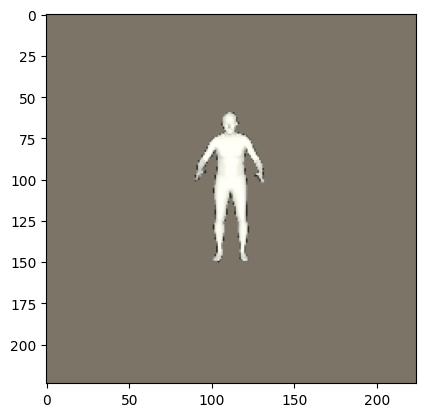

In [53]:
plt.imshow(img)